# COVID-19 World Vaccination Progress
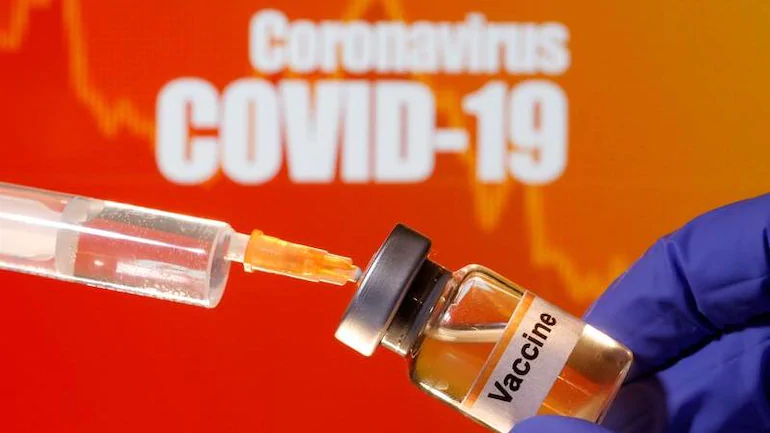

In [117]:
import numpy as np
import pandas as pd
import missingno as m
import plotly.express as px

# Reading The Dataset

In [118]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Albania      ALB  2021-01-10                 0.0                0.0   
1  Albania      ALB  2021-01-11                 NaN                NaN   
2  Albania      ALB  2021-01-12               128.0              128.0   
3  Albania      ALB  2021-01-13               188.0              188.0   
4  Albania      ALB  2021-01-14               266.0              266.0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN                64.0   
2                      NaN                     NaN                64.0   
3                      NaN                    60.0                63.0   
4                      NaN                    78.0                66.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                           0.00   
1                             NaN                            NaN   
2                            0.00                           0.00   
3                            0.01                           0.01   
4                            0.01                           0.01   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            22.0   
2                                  NaN                            22.0   
3                                  NaN                            22.0   
4                                  NaN                            23.0   

          vaccines         source_name  \
0  Pfizer/BioNTech  Ministry of Health   
1  Pfizer/BioNTech  Ministry of Health   
2  Pfizer/BioNTech  Ministry of Health   
3  Pfizer/BioNTech  Ministry of Health   
4  Pfizer/BioNTech  Ministry of Health   

                                      source_website  
0  https://shendetesia.gov.al/covid19-ministria-e...  
1  https://shendetesia.gov.al/covid19-ministria-e...  
2  https://shendetesia.gov.al/covid19-ministria-e...  
3  https://shendetesia.gov.al/covid19-ministria-e...  
4  https://shendetesia.gov.al/covid19-ministria-e...

In [119]:
df.shape

(6108, 15)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6108 entries, 0 to 6107
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              6108 non-null   object 
 1   iso_code                             5752 non-null   object 
 2   date                                 6108 non-null   object 
 3   total_vaccinations                   3908 non-null   float64
 4   people_vaccinated                    3481 non-null   float64
 5   people_fully_vaccinated              2368 non-null   float64
 6   daily_vaccinations_raw               3298 non-null   float64
 7   daily_vaccinations                   5917 non-null   float64
 8   total_vaccinations_per_hundred       3908 non-null   float64
 9   people_vaccinated_per_hundred        3481 non-null   float64
 10  people_fully_vaccinated_per_hundred  2368 non-null   float64
 11  daily_vaccinations_per_million

In [121]:
df.describe().style.background_gradient(cmap="Blues")

# Data Cleaning

In [122]:
df.isnull().sum()

country                                   0
iso_code                                356
date                                      0
total_vaccinations                     2200
people_vaccinated                      2627
people_fully_vaccinated                3740
daily_vaccinations_raw                 2810
daily_vaccinations                      191
total_vaccinations_per_hundred         2200
people_vaccinated_per_hundred          2627
people_fully_vaccinated_per_hundred    3740
daily_vaccinations_per_million          191
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

<AxesSubplot:>

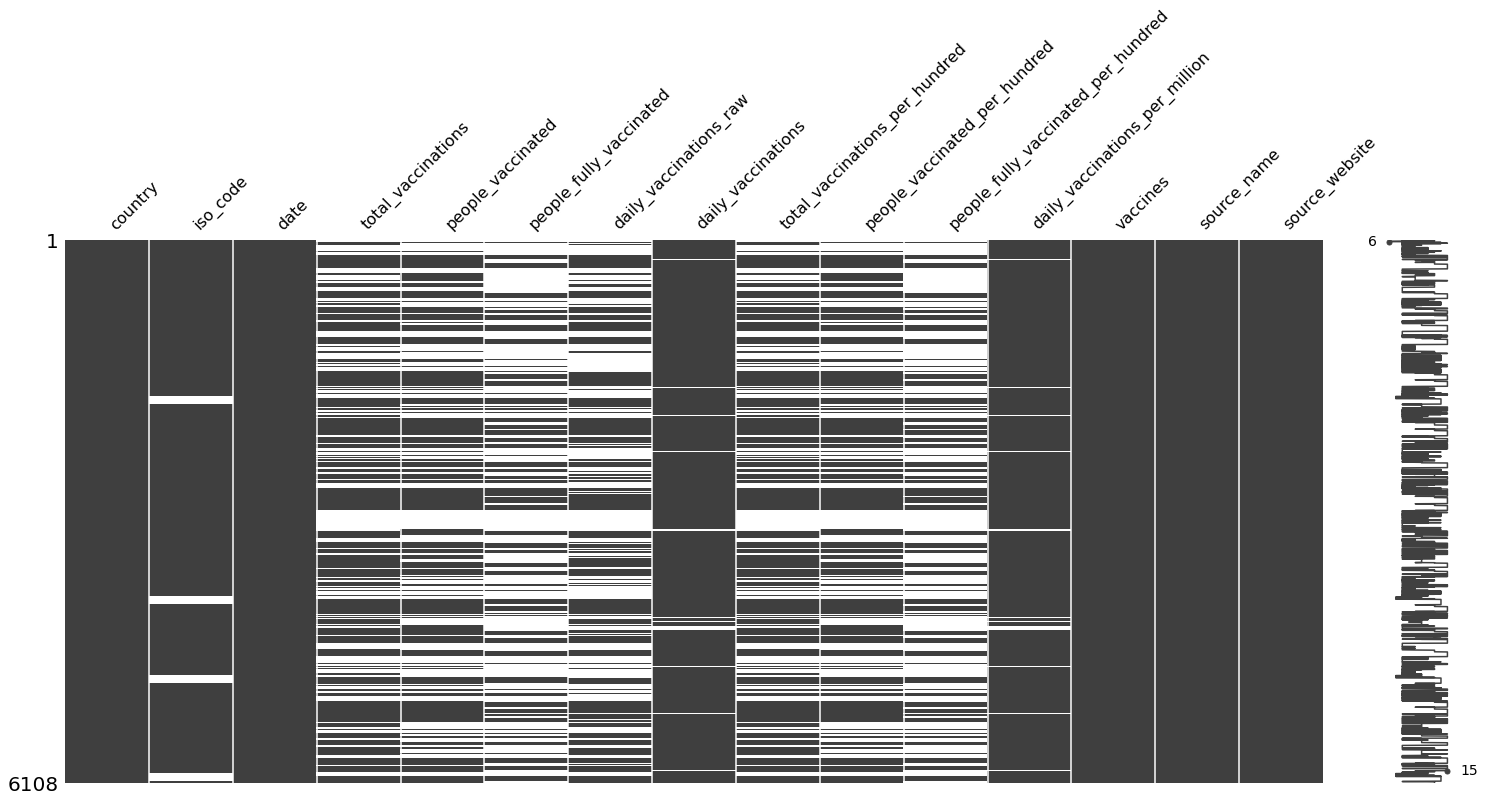

In [123]:
m.matrix(df)

## Filling All the Missing Values as 0

In [124]:
df = df.fillna(0)

In [125]:
df.shape

(6108, 15)

In [126]:
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Albania      ALB  2021-01-10                 0.0                0.0   
1  Albania      ALB  2021-01-11                 0.0                0.0   
2  Albania      ALB  2021-01-12               128.0              128.0   
3  Albania      ALB  2021-01-13               188.0              188.0   
4  Albania      ALB  2021-01-14               266.0              266.0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      0.0                     0.0                 0.0   
1                      0.0                     0.0                64.0   
2                      0.0                     0.0                64.0   
3                      0.0                    60.0                63.0   
4                      0.0                    78.0                66.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                           0.00   
1                            0.00                           0.00   
2                            0.00                           0.00   
3                            0.01                           0.01   
4                            0.01                           0.01   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  0.0                             0.0   
1                                  0.0                            22.0   
2                                  0.0                            22.0   
3                                  0.0                            22.0   
4                                  0.0                            23.0   

          vaccines         source_name  \
0  Pfizer/BioNTech  Ministry of Health   
1  Pfizer/BioNTech  Ministry of Health   
2  Pfizer/BioNTech  Ministry of Health   
3  Pfizer/BioNTech  Ministry of Health   
4  Pfizer/BioNTech  Ministry of Health   

                                      source_website  
0  https://shendetesia.gov.al/covid19-ministria-e...  
1  https://shendetesia.gov.al/covid19-ministria-e...  
2  https://shendetesia.gov.al/covid19-ministria-e...  
3  https://shendetesia.gov.al/covid19-ministria-e...  
4  https://shendetesia.gov.al/covid19-ministria-e...

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt


In [128]:
df.vaccines.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1549
Pfizer/BioNTech                                                                       1149
Oxford/AstraZeneca, Pfizer/BioNTech                                                    871
Oxford/AstraZeneca                                                                     447
Moderna, Pfizer/BioNTech                                                               371
Sputnik V                                                                              203
Sinovac                                                                                197
Pfizer/BioNTech, Sinovac                                                               146
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      144
Sinopharm/Beijing                                                                      110
Oxford/AstraZeneca, Sinopharm/Beijing                                                  106

In [129]:
import plotly.express as px
fig = px.histogram(df, x="vaccines",title='Different Types of Vaccines')
fig.update_xaxes(showticklabels=False)

In [130]:
fig = px.bar(y=df.vaccines.value_counts(),x=df.vaccines.unique(),title= 'Most Vaccine used in order')
fig.update_xaxes(showticklabels=False)
fig.show()

In [131]:
fig = px.scatter_3d(df, x='total_vaccinations', y='people_vaccinated', z='people_fully_vaccinated',
              title='Total vaccination vs People Vaccination and People Fully Vaccinated ')
fig.show()

In [132]:
fig = px.scatter(df, x="total_vaccinations_per_hundred", y="people_vaccinated_per_hundred",
	         size="daily_vaccinations_raw", color="source_name",
                 hover_name="source_website", log_x=True, size_max=60)

fig.show()

# Total Vaccinations with Date

In [133]:
df.sort_values(by ='total_vaccinations' , ascending=False).head(10).style.background_gradient(cmap="CMRmap_r")

# Covaxin Vaccinations Top Count

In [134]:
df[df["vaccines"]=="Covaxin, Oxford/AstraZeneca"].sort_values(by ='total_vaccinations' , ascending=False).head(10).style.background_gradient(cmap="CMRmap_r")

# India vacccinations details - data, total_vaccinations, vaccines

In [135]:
display(df[df["country"] == "India"] [['country',"date", "total_vaccinations", "vaccines","source_name","source_website"]].
        sort_values(by="total_vaccinations", ascending= False).style.background_gradient(cmap="CMRmap_r"))

In [136]:
df.drop(["source_website", "source_name", "daily_vaccinations_per_million"], axis=1, inplace= True)

# In India top 10 days graph

In [137]:
df1 = pd.DataFrame()
df1[["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]=df[
    ["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]
df1.head()

country        date  total_vaccinations  people_vaccinated  \
0  Albania  2021-01-10                 0.0                0.0   
1  Albania  2021-01-11                 0.0                0.0   
2  Albania  2021-01-12               128.0              128.0   
3  Albania  2021-01-13               188.0              188.0   
4  Albania  2021-01-14               266.0              266.0   

   people_fully_vaccinated  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [138]:
India = (df1[df1["country"]== "India"].sort_values(by ='total_vaccinations' , ascending=False)).sort_values(by = "date")

In [139]:
India.head()

country        date  total_vaccinations  people_vaccinated  \
2635   India  2021-01-15                 0.0                0.0   
2636   India  2021-01-16            191181.0           191181.0   
2637   India  2021-01-17            224301.0           224301.0   
2638   India  2021-01-18            454049.0           454049.0   
2639   India  2021-01-19            674835.0           674835.0   

      people_fully_vaccinated  
2635                      0.0  
2636                      0.0  
2637                      0.0  
2638                      0.0  
2639                      0.0

# plot of total_vaccine, people_vaccined and people_fully_vaccined

In [140]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=India['date'], y=India['people_vaccinated'], name='people_vaccinated',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=India['date'], y=India['total_vaccinations'], name = 'total_vaccinations',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(x=India['date'], y=India['people_fully_vaccinated'], name = 'people_fully_vaccinated',
                         line=dict(color='black', width=4)))


# United States top 10 days graph

In [141]:
df_usa = pd.DataFrame()
df_usa[["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]=df[
    ["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]

Usa = (df_usa[df_usa["country"]== "United States"].sort_values(by ='total_vaccinations' , ascending=False)).sort_values(by = "date")

fig = go.Figure()

fig.add_trace(go.Scatter(x=Usa['date'], y=Usa['people_vaccinated'], name='people_vaccinated',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=Usa['date'], y=Usa['total_vaccinations'], name = 'total_vaccinations',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(x=Usa['date'], y=Usa['people_fully_vaccinated'], name = 'people_fully_vaccinated',
                         line=dict(color='black', width=4)))

# United Kingdom top 10 days graph

In [142]:
df_uk = pd.DataFrame()
df_uk[["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]=df[
    ["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]

Uk = (df_uk[df_uk["country"]== "United Kingdom"].sort_values(by ='total_vaccinations' , ascending=False)).sort_values(by = "date")

fig = go.Figure()

fig.add_trace(go.Scatter(x=Uk['date'], y=Uk['people_vaccinated'], name='people_vaccinated',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=Uk['date'], y=Uk['total_vaccinations'], name = 'total_vaccinations',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(x=Uk['date'], y=Uk['people_fully_vaccinated'], name = 'people_fully_vaccinated',
                         line=dict(color='black', width=4)))

# England top 10 days graph

In [143]:
df_england = pd.DataFrame()
df_england[["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]=df[
    ["country", "date", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated"]]

Eng = (df_england[df_england["country"]== "England"].sort_values(by ='total_vaccinations' , ascending=False)).sort_values(by = "date")

fig = go.Figure()

fig.add_trace(go.Scatter(x=Eng['date'], y=Eng['people_vaccinated'], name='people_vaccinated',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=Eng['date'], y=Eng['total_vaccinations'], name = 'total_vaccinations',
                         line=dict(color='firebrick', width=3)))
fig.add_trace(go.Scatter(x=Eng['date'], y=Eng['people_fully_vaccinated'], name = 'people_fully_vaccinated',
                         line=dict(color='black', width=4)))

# Top 5 Vaccination Countries

In [144]:
cols = ['country', 'total_vaccinations']
df2 =df[cols].groupby('country').sum().sort_values('total_vaccinations', ascending=False)
df2 = df2.head()
df2 = df2.sort_values(by ='total_vaccinations' , ascending=True)
df2 = df2.reset_index()

In [145]:
import plotly.express as px
fig = px.bar(df2, x='country', y='total_vaccinations')
fig.show()

# Least 5 Vaccination Countries

In [146]:
cols = ['country', 'total_vaccinations']
df3 =df[cols].groupby('country').sum().sort_values('total_vaccinations', ascending=False)
df3 = df3.tail()
df3 = df3.sort_values(by ='total_vaccinations' , ascending=True)
df3 = df3.reset_index()

In [147]:
import plotly.express as px
fig = px.bar(df3, x='country', y='total_vaccinations')
fig.show()

# Top 5 vaccines per 100

In [148]:
cols = ['country', 'total_vaccinations_per_hundred']
df2 =df[cols].groupby('country').sum().sort_values('total_vaccinations_per_hundred', ascending=False)
df2 = df2.head()
df2 = df2.sort_values(by ='total_vaccinations_per_hundred' , ascending=True)
df2 = df2.reset_index()

In [149]:
import plotly.express as px
fig = px.bar(df2, x='country', y='total_vaccinations_per_hundred')
fig.show()

# Least 5 vaccines per 100

In [150]:
cols = ['country', 'total_vaccinations_per_hundred']
df3 =df[cols].groupby('country').sum().sort_values('total_vaccinations_per_hundred', ascending=False)
df3 = df3.tail()
df3 = df3.sort_values(by ='total_vaccinations_per_hundred' , ascending=True)
df3 = df3.reset_index()

In [151]:
import plotly.express as px
fig = px.bar(df3, x='country', y='total_vaccinations_per_hundred')
fig.show()

# Most taken vaccine around the world

In [152]:
cols = ['vaccines', 'total_vaccinations']
df4 =df[cols].groupby('vaccines').sum().sort_values('total_vaccinations', ascending=False)
df4 = df4
df4 = df4.sort_values(by ='total_vaccinations' , ascending=True)
df4 = df4.reset_index()

In [153]:
fig = px.bar(df4, y='vaccines', x='total_vaccinations')
fig.show()

# Top countries in term of daily vaccines

In [154]:
cols = ['country', 'daily_vaccinations']
df5 =df[cols].groupby('country').sum().sort_values('daily_vaccinations', ascending=False)
df5 = df5.reset_index()

In [155]:
fig = px.bar(df5, y='country', x='daily_vaccinations')
fig.show()

In [156]:
df5

country  daily_vaccinations
0          United States          94004025.0
1                  China          49687760.0
2                  India          24667468.0
3         United Kingdom          23986675.0
4                England          20215152.0
..                   ...                 ...
128                Egypt              1314.0
129           Montserrat               645.0
130  Trinidad and Tobago               441.0
131             Honduras                 0.0
132         Saint Helena                 0.0

[133 rows x 2 columns]

## For Top 5 countries

In [162]:
fig = px.bar(df5.head(), y='country', x='daily_vaccinations')
fig.show()

## For Least 5 Countries

In [161]:
fig = px.bar(df5.tail(), y='country', x='daily_vaccinations')
fig.show()

In [158]:
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Albania      ALB  2021-01-10                 0.0                0.0   
1  Albania      ALB  2021-01-11                 0.0                0.0   
2  Albania      ALB  2021-01-12               128.0              128.0   
3  Albania      ALB  2021-01-13               188.0              188.0   
4  Albania      ALB  2021-01-14               266.0              266.0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      0.0                     0.0                 0.0   
1                      0.0                     0.0                64.0   
2                      0.0                     0.0                64.0   
3                      0.0                    60.0                63.0   
4                      0.0                    78.0                66.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                           0.00   
1                            0.00                           0.00   
2                            0.00                           0.00   
3                            0.01                           0.01   
4                            0.01                           0.01   

   people_fully_vaccinated_per_hundred         vaccines  
0                                  0.0  Pfizer/BioNTech  
1                                  0.0  Pfizer/BioNTech  
2                                  0.0  Pfizer/BioNTech  
3                                  0.0  Pfizer/BioNTech  
4                                  0.0  Pfizer/BioNTech

In [163]:
fig=px.choropleth(data_frame=df,
                          locations=df['country'],
                          locationmode='country names',
                          color=df['vaccines'],
                          animation_group=df['vaccines'])
fig.update_layout(dict1={'title':'Covid-Vaccines'})
fig.update_layout(showlegend=False)
fig.show() 

# Summery

## Covaxin is used globally
## In India Total Vaccination and People Vaccination rate is very high
## India Secured 4th rank in Globally Total Vaccination Country list 
## India Secured 3rd rank in Globally Daily Vaccination Country list 